Lab 8: Galaxy Rotation Curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
import scipy.integrate
import plotly.graph_objects as go

In [2]:
#after we import the data as given above, we need to bring in the files into python. we split them into two separate
#groups-- galfiles being the spectra taken at their respective longitude, and calfiles being the calibration files
#we'll use to calibrate our spectra. we print out one set just to make sure that they got ordered right. 
imgaldata = '/Users/natenick/Desktop/lab7data/galaxyData/'
galfiles = glob.glob(imgaldata + "galpos*")
galfiles.sort()
for file in galfiles:
    print(file)
calfiles = glob.glob(imgaldata + 'calib*')

/Users/natenick/Desktop/lab7data/galaxyData/galpos00.dat
/Users/natenick/Desktop/lab7data/galaxyData/galpos10.dat
/Users/natenick/Desktop/lab7data/galaxyData/galpos20.dat
/Users/natenick/Desktop/lab7data/galaxyData/galpos30.dat
/Users/natenick/Desktop/lab7data/galaxyData/galpos40.dat
/Users/natenick/Desktop/lab7data/galaxyData/galpos50.dat
/Users/natenick/Desktop/lab7data/galaxyData/galpos60.dat
/Users/natenick/Desktop/lab7data/galaxyData/galpos70.dat
/Users/natenick/Desktop/lab7data/galaxyData/galpos80.dat
/Users/natenick/Desktop/lab7data/galaxyData/galpos90.dat
/Users/natenick/Desktop/lab7data/galaxyData/galposs9.dat


In [3]:
#we need to form these spectra into a form that we can work with. this is a pretty lengthy process, but we'll go step
#by step to simplify it. first, we define an empty array to throw all of our data into (in the end).
gal_spectra = []
for galfile in galfiles:
    with open(galfile) as galdata:
        spectrum_rows = []
#we open the files and open them while also naming them 'galdata'. now we also define an array called spectrum_rows
#to bring all this data into.
        for j, row in enumerate(galdata, start=1):
            if j%4 == 0:
                spectrum_rows.append(row)
#'enumerate' is a fancy version of ordering the rows in galdata. only every four lines or so has data we want, so we
#tell python that if the remainder of a row is zero, then it contains data (not random text lines that fill up the
#rest of the array) and we want to add it to our spectrum_rows. this is how we weed out everything else and come up
#with the data we need to continue.
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows:
            temp_spec = row.split(' ')
#now, we make a tot_spectrum and fill it up with zeros. this is us preparing an array with 1024 rows to append our 
#data into. the data we added to spectrum_rows is not perfect, however-- we have the rows we need, but to python,
#there are still spaces in-between each data point, and it doesn't really know what to do until we figure out how to 
#split them. luckily, there's a 'split' function-- we call 'split' and give it the marker in which to split the rows
#up. here, our marker is a blank space. now we have more condensed data, but it still has blank spaces and white
#spaces. we'll see how to deal with them next.
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val)
#we make yet another array named 'spec', but the name isn't important, we're just running out of array names. we take
#each value in our temp_spec earlier and tell it that if one of the values within it is not a blank (val != '') or a 
#whitespace (val != '\n'), then it's a data value and we want to append each of these to our spec array. whitespaces
#are python's way of making new rows, so at the end of a row, a '\n' will be attached to denote the end of a row. once
#we weed both of these our, spec array should be populated by just numbers, and that's exactly what we want.
            tot_spectrum = (tot_spectrum + np.float64(spec))/len(spectrum_rows)
        gal_spectra.append(tot_spectrum)
#to finish off this process, we define a tot_spectrum and append it with our data points. first, though, we need to 
#make the spec values at every point into floating-point numbers so they aren't integers, and python can work with 
#them easier, and we can be more precise in our summation. originally, tot_spectrum is just a bunch of zeroes, so we
#append with our actual stripped data. and, for a naming convention, we append our original gal_spectra with this full
#tot_spectrum, and we now have an array with the dimensions we need. cutting any corners of the process above will
#most likely mess with the dimensions of the array, and without the right sizes, we can't plot the data, and it's
#essentially worthless. the same process is seen below-- the only difference is that we're doing it with our
#calibration data and not our actual spectral data. there's only one calibration file, but we just do the whole 
#process over-- just to be sure. thank you copy & paste. we also normalize the flux data by dividing it by the length
#of the spectrum_rows. if we didn't do this, the calibration data would have a higher flux than our actual data, and
#trying to calibrate that later would be.... uncomfortable.
print(len(gal_spectra))
cal_spectra = []
for calfile in calfiles:
    with open(calfile) as caldata:
        spectrum_rows = []
        for j, row in enumerate(caldata, start=1):
            if j%4 == 0:
                spectrum_rows.append(row)
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows:
            temp_spec = row.split(' ')
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val)
            tot_spectrum = (tot_spectrum + np.float64(spec))/len(spectrum_rows)
        cal_spectra.append(tot_spectrum)
print(len(cal_spectra))

11
1


Text(0, 0.5, 'Relative Flux')

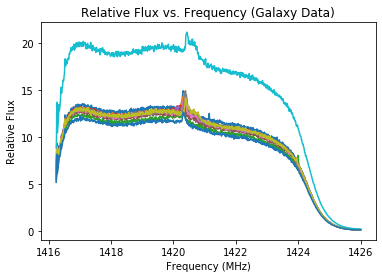

In [48]:
order = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
frequency = np.arange(1416,1426,0.009766)
#this is defining the range of our x-axis. the range itself consists of the first two numbers, which are both in units
#of MHz. the third number is the step size. we know that the array is between 1416 and 1426 MHz, but since there are
#1024 rows in this range, we take 10/1024 = 0.009766 as the step size. it's the same for both spectra, so we only 
#need to define it once. the order part isn't used, but was almost the format we'd use to graph. just left it there
for i in range(len(gal_spectra)):
    gal_spectra_ = gal_spectra[i][25:]
    plt.plot(frequency[25:], gal_spectra_)
#above, we make the for loop to cycle through and graph each column of data. we use the range(len(gal_spectra)) as a 
#clever way to avoid finding the actual dimensions of the array, and even though we already know it, it takes away an
#opportunity for error. there is a spike at the 25th iteration of the frequency axis, so to preserve the integrity of
#our statistical analysis later on, we cut that part out of our graph. losing 25 or so rows out of 1024 possible isn't
#a huge concern for us. below is just naming the axes of our plot. 
plt.show
plt.title('Relative Flux vs. Frequency (Galaxy Data)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')

Text(0, 0.5, 'Relative Flux')

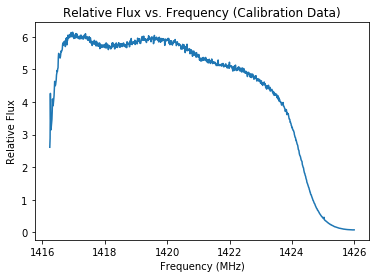

In [49]:
for i in range(len(cal_spectra)):
    cal_spectra_ = cal_spectra[i][25:]
    plt.plot(frequency[25:], cal_spectra_)
#again, there's only one file in the calibration data folder, but we love copy and paste, and this is a general format
#for if there were multiple calibration files. as we can see below, it's just one curve.
plt.show
plt.title('Relative Flux vs. Frequency (Calibration Data)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')

Text(0, 0.5, 'Relative Flux')

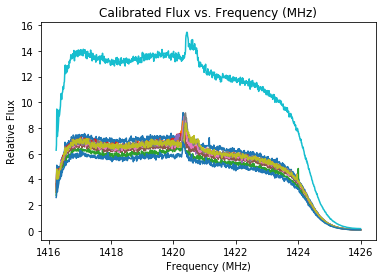

In [50]:
gal_spectra_cal = np.zeros(np.array(gal_spectra).shape)
for i in range(len(gal_spectra)):
    gal_spectra_cal[i] = gal_spectra[i] - cal_spectra
for i in range(len(gal_spectra)):
    gal_spectra_cal_ = gal_spectra_cal[i][25:]
    plt.plot(frequency[25:], gal_spectra_cal_)
#here's where we actually calibrate the data. we subtract each iteration of the galactic spectral data for each
#longitude and plot the resultant spectra. the height of the curves is shifted to be lower, but the shape of the 
#curves themselves remain unchanged. we do need to include the outlier that sits far above the rest-- we don't care
#too much about that, but we need to extract a doppler shift from it. 
plt.title('Calibrated Flux vs. Frequency (MHz)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')

Redshift at Longitude 0, in MHz = 0.1957517666999138


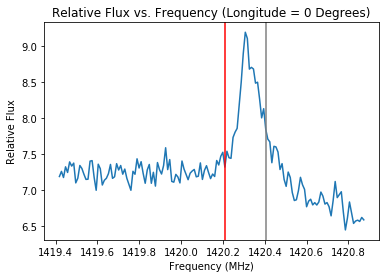

In [67]:
plt.plot(frequency[350:500],gal_spectra_cal[0][350:500])
#we plot the spectra as they were earlier, except we focus on the direct vicinity of the 21cm emission line, which 
#occurs in a rest frame at about 1420 MHz. we only take iterations 350 through 500 of the x-axis to get a close-up
#look at the features we're interested in.
plt.axvline(x=1420.4057517667,color='grey')
#this line-- which is at the same x-value and has the same color for all the following graphs-- represents the 21cm
#hydrogen emission line in a rest frame. that's why it's always at the same place on each plot.
plt.axvline(x=1420.21,color='red')
#the peak and surrounding exponential decay is all the area associated with the 1420 MHz hydrogen line. we find the 
#minimum frequency where this exponential decay behavior is apparent-- this represents the largest redshift of the 
#cloud. this is the fastest velocity the cloud in question is moving away from us. we only care about this max 
#velocity. this is a rough estimate-- we acknowledge error in this estimation, which can be seen later. the process
#for every longitudinal value is the same as laid out here. 
rs0 = 1420.4057517667 - 1420.21
plt.title('Relative Flux vs. Frequency (Longitude = 0 Degrees)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.show
print('Redshift at Longitude 0, in MHz =',rs0)

Redshift at Longitude 10, in MHz = 0.2557517666998592


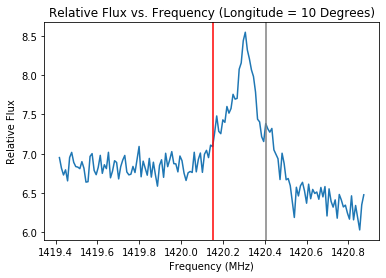

In [68]:
plt.plot(frequency[350:500],gal_spectra_cal[1][350:500])
plt.axvline(x=1420.4057517667,color='grey')
plt.axvline(x=1420.15,color='red')
rs1 = 1420.4057517667 - 1420.15
plt.title('Relative Flux vs. Frequency (Longitude = 10 Degrees)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.show
print('Redshift at Longitude 10, in MHz =',rs1)

Redshift at Longitude 20, in Mhz = 0.20075176670002293


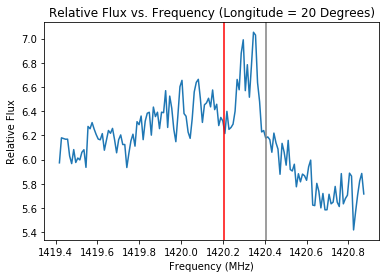

In [69]:
plt.plot(frequency[350:500],gal_spectra_cal[2][350:500])
plt.axvline(x=1420.4057517667,color='grey')
plt.axvline(x=1420.205,color='red')
rs2 = 1420.4057517667 - 1420.205
plt.title('Relative Flux vs. Frequency (Longitude = 20 Degrees)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.show
print('Redshift at Longitude 20, in Mhz =',rs2)

Redshift at Longitude 30, in MHz = 0.14675176669993562


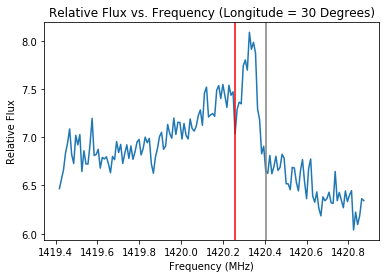

In [70]:
plt.plot(frequency[350:500],gal_spectra_cal[3][350:500])
plt.axvline(x=1420.4057517667,color='grey')
plt.axvline(x=1420.259,color='red')
rs3 = 1420.4057517667 - 1420.259
plt.title('Relative Flux vs. Frequency (Longitude = 30 Degrees)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.show
print('Redshift at Longitude 30, in MHz =',rs3)

Redshift at Longitude 40, in MHz = 0.40575176669995017


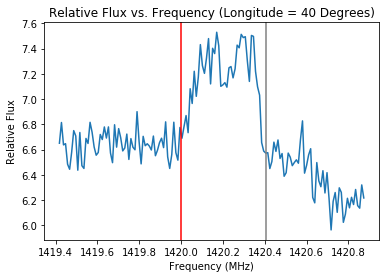

In [71]:
plt.plot(frequency[350:500],gal_spectra_cal[4][350:500])
plt.axvline(x=1420.4057517667,color='grey')
plt.axvline(x=1420,color='red')
rs4 = 1420.4057517667 - 1420
plt.title('Relative Flux vs. Frequency (Longitude = 40 Degrees)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.show
print('Redshift at Longitude 40, in MHz =',rs4)

Redshift at Longitude 50, in MHz = 0.2357517666998774


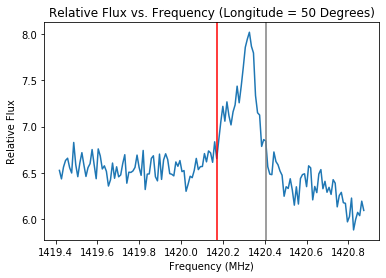

In [72]:
plt.plot(frequency[350:500],gal_spectra_cal[5][350:500])
plt.axvline(x=1420.4057517667,color='grey')
plt.axvline(x=1420.17,color='red')
rs5 = 1420.4057517667 - 1420.17
plt.title('Relative Flux vs. Frequency (Longitude = 50 Degrees)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.show
print('Redshift at Longitude 50, in MHz =',rs5)

Redshift at Longitude 60, in MHz = 0.15575176669995017


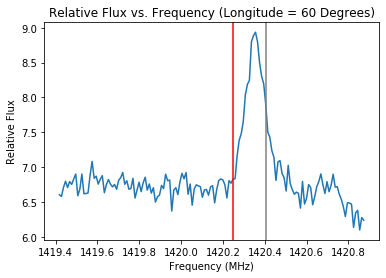

In [73]:
plt.plot(frequency[350:500],gal_spectra_cal[6][350:500])
plt.axvline(x=1420.4057517667,color='grey')
plt.axvline(x=1420.25,color='red')
rs6 = 1420.4057517667 - 1420.25
plt.title('Relative Flux vs. Frequency (Longitude = 60 Degrees)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.show
print('Redshift at Longitude 60, in MHz =',rs6)

Redshift at Longitude 70, in MHz = 0.1552517666998483


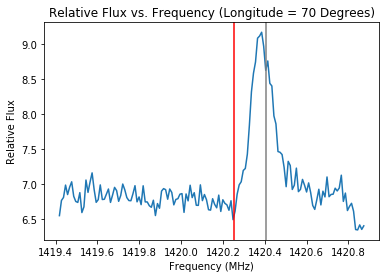

In [74]:
plt.plot(frequency[350:500],gal_spectra_cal[7][350:500])
plt.axvline(x=1420.4057517667,color='grey')
plt.axvline(x=1420.2505,color='red')
rs7 = 1420.4057517667 - 1420.2505
plt.title('Relative Flux vs. Frequency (Longitude = 70 Degrees)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.show
print('Redshift at Longitude 70, in MHz =',rs7)

Redshift at Longitude 80, in MHz = 0.11575176669998655


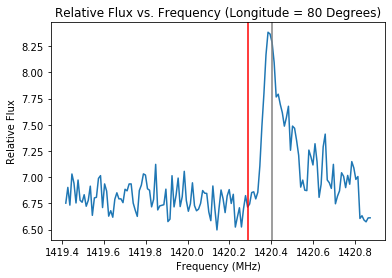

In [75]:
plt.plot(frequency[350:500],gal_spectra_cal[8][350:500])
plt.axvline(x=1420.4057517667,color='grey')
plt.axvline(x=1420.29,color='red')
rs8 = 1420.4057517667 - 1420.29
plt.title('Relative Flux vs. Frequency (Longitude = 80 Degrees)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.show
print('Redshift at Longitude 80, in MHz =',rs8)

Redshift at Longitude 90, in MHz = 0.05575176670004112


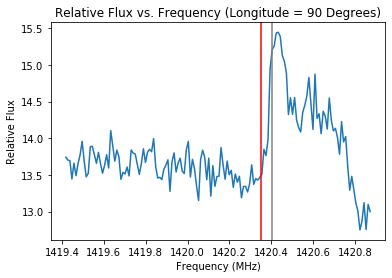

In [76]:
plt.plot(frequency[350:500],gal_spectra_cal[9][350:500])
plt.axvline(x=1420.4057517667,color='grey')
plt.axvline(x=1420.35,color='red')
rs9 = 1420.4057517667 - 1420.35
plt.title('Relative Flux vs. Frequency (Longitude = 90 Degrees)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')
plt.show
print('Redshift at Longitude 90, in MHz =',rs9)

In [79]:
#here, our goal is to find the uncorrected velocity of each cloud at each longitude. we use the equation given in the
#theory section of the write-up to determine the velocity given the redshift of each cloud. in the end, we convert to 
#km/s from m/s, hence the division by 1000. i always like to know what each value is at each step of this process, so
#that's why i print them all here. 
v0 = ((rs0)*(299792438)/1420.406)/1000
print(v0)
v1 = ((rs1)*(299792438)/1420.406)/1000
print(v1)
v2 = ((rs2)*(299792438)/1420.406)/1000
print(v2)
v3 = ((rs3)*(299792438)/1420.406)/1000
print(v3)
v4 = ((rs4)*(299792438)/1420.406)/1000
print(v4)
v5 = ((rs5)*(299792438)/1420.406)/1000
print(v5)
v6 = ((rs6)*(299792438)/1420.406)/1000
print(v6)
v7 = ((rs7)*(299792438)/1420.406)/1000
print(v7)
v8 = ((rs8)*(299792438)/1420.406)/1000
print(v8)
v9 = ((rs9)*(299792438)/1420.406)/1000
print(v9)

41.31558116607109
53.97924654060741
42.37088661397311
30.973587776861624
85.63840997699621
49.75802474909531
32.873137583046876
32.76760703823747
24.43069400002266
11.767028625486333


In [62]:
#using the correction derived in the theory section of the write-up-- vsun0 = 255*sin(l)-- we calculate the velocity
#of the sun along the line of sight of each galactic longitudinal measurement. for the same reasons as above, i like
#to see the values to make sure i didn't fuck it up. python also works in radians, so we did a quick conversion for
#each 10-degree step into radians. it's not perfect to 100 decimal places, but it's close enough.
vsun0 = 255*np.sin(0)
vsun1 = 255*np.sin(0.174)
vsun2 = 255*np.sin(0.349)
vsun3 = 255*np.sin(0.524)
vsun4 = 255*np.sin(0.698)
vsun5 = 255*np.sin(0.873)
vsun6 = 255*np.sin(1.047)
vsun7 = 255*np.sin(1.222)
vsun8 = 255*np.sin(1.396)
vsun9 = 255*np.sin(1.571)
print(vsun0)
print(vsun1)
print(vsun2)
print(vsun3)
print(vsun4)
print(vsun5)
print(vsun6)
print(vsun7)
print(vsun8)
print(vsun9)

0.0
44.14644766201139
87.19935717982054
127.5885947188281
163.88511243923142
195.39629344340682
220.8112858783948
239.64511613463182
251.1143048088406
254.99999471094628


In [63]:
#vlsr = 10.48, 9.86, 8.96, 7.77, 6.33, 4.7, 2.93, 1.07, -0.82, -2.68. these values are given in the data headers of 
#all the data files in the galactic spectra files. here we just define them so we can use them later, and cut down a 
#little bit on the typing. now that i think about it, though, if i had just typed in the exact numbers in the 
#full correction equation we'll see next, that would've technically saved me more time. oh well, too late. 
vlsr0 = 10.48
vlsr1 = 9.86
vlsr2 = 8.96
vlsr3 = 7.77
vlsr4 = 6.33
vlsr5 = 4.7
vlsr6 = 2.93
vlsr7 = 1.07
vlsr8 = -0.82
vlsr9 = -2.68

In [87]:
vlat00 = v0+vsun0-vlsr0
vlat10 = v1+vsun1-vlsr1
vlat20 = v2+vsun2-vlsr2
vlat30 = v3+vsun3-vlsr3
vlat40 = v4+vsun4-vlsr4
vlat50 = v5+vsun5-vlsr5
vlat60 = v6+vsun6-vlsr6
vlat70 = v7+vsun7-vlsr7
vlat80 = v8+vsun8-vlsr8
vlat90 = v9+vsun9-vlsr9
#our fully-corrected velocities are given above. we take the doppler-measured velocity (first term), add the velocity
#of the sun along the line of sight of the object, since we're moving toward objects that are redshifting away from 
#us(second term), and subtract the lsr value (since they're moving towards us, and are local) (third term). then,
#we make a nice table to relate the final rotation velocity to the initial doppler shift values used. we also include
#the physical distance from the center of the galaxy, since we care more about this value than the galactic longitude.
#the conversion is simple-- the maximum value is out to the value of 8.1kpc, so we multiply this value by the sin
#of the longtitude.
fig = go.Figure(data=[go.Table(header=dict(values=['Rotation Velocity (km/s)', 'Frequency (MHz)', 'Radius (kpc)']),
                 cells=dict(values=[[vlat00, vlat10, vlat20, vlat30, vlat40, vlat50, vlat60, vlat70, vlat80, vlat90], [1420.21,1420.15,1420.205,1420.259,1420,1420.17,1420.25,1420.2505,1420.29,1420.35], [8.1*np.sin(0),8.1*np.sin(0.175),8.1*np.sin(0.35),8.1*np.sin(0.525),8.1*np.sin(0.7),8.1*np.sin(0.875),8.1*np.sin(1.05),8.1*np.sin(1.225),8.1*np.sin(1.4),8.1*np.sin(1.575)]]))
                     ])
fig.show()

<ErrorbarContainer object of 3 artists>

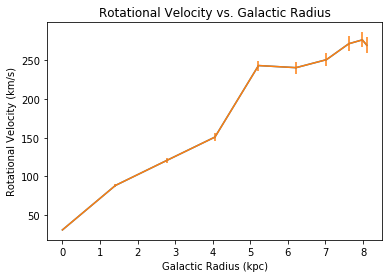

In [65]:
xvals = (8.1*np.sin(0),8.1*np.sin(0.175),8.1*np.sin(0.35),8.1*np.sin(0.525),8.1*np.sin(0.7),8.1*np.sin(0.875),8.1*np.sin(1.05),8.1*np.sin(1.225),8.1*np.sin(1.4),8.1*np.sin(1.575))
yvals = (vlat00,vlat10,vlat20,vlat30,vlat40,vlat50,vlat60,vlat70,vlat80,vlat90)
#using the conversions above, we now define xvals and yvals in preparation to graph them. we convert to physical 
#distance in the xvals, and yvals is the fully corrected velocity. like we said earlier, though, there is an error
#since we estimated some of the minimum frequencies when determining doppler shifts. this error will propogate as the
#rotational velocity increases, so we use a vaiable error function, seen below.
plt.title('Rotational Velocity vs. Galactic Radius')
plt.xlabel('Galactic Radius (kpc)')
plt.ylabel('Rotational Velocity (km/s)')
plt.plot(xvals,yvals)
plt.errorbar(xvals, yvals, xerr=0, yerr=[0,10*np.sin(0.174),10*np.sin(0.349),10*np.sin(0.524),10*np.sin(0.698),10*np.sin(0.873),10*np.sin(1.047),10*np.sin(1.222),10*np.sin(1.396),10*np.sin(1.571)])
#we estimate an error of 10 km/s, which may sound like a lot, but once you see the actual error bars, it's not bad.
#we leave the x error alone since it's just distance. this graph shows us that as velocity increases, error increases.
#we expect orbital velocity to drop off with the known mass distribution of the milky way, but in fact, it stays 
#constant, even increasing for a time. this contradicts keplerian orbital mechanics on a galactic scale and implies
#the existence of an unknown mass source that compensates for the increasing radius. a more in-depth discussion can
#be read in the full write-up.

In [ ]:
#now that we have used archive data to plot the rotation curve of the milky way galaxy up to 8.1 kpc, the experimental
#portion of this lab is concluded. we analyze the factors that let us take these measurements, their facets, and also
#discuss the implications of the results in the full write-up. unfortunately, we were not able to take our own data,
#but we expect the results to be the same. the conclusions can be seen in the write-up.